In [103]:
import pandas as pd
import pyreadstat
import sklearn
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import numpy as np
import math

In [104]:

df, meta = pyreadstat.read_sav(r'C:\Users\Aaron\OneDrive\Desktop\Mar19-public\Mar19-public\Mar19public.sav')

In [105]:
display(df.describe())
display(df.info())

,respid,sample,int_date,fcall,attempt,refusal,lang,cregion,state,scregion,...,hh1,hh3,adults,ql1,ql1a,qc1,ll,cp,money2,weight
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,...,1503.000000,1185.000000,1503.000000,300.000000,33.000000,1203.000000,1503.000000,1503.000000,1203.000000,1503.000000
mean,91914.548902,1.800399,190321.940120,190321.852961,2.263473,0.027279,1.045908,2.679308,28.556221,2.644045,...,2.799734,2.650633,2.005323,1.380000,2.939394,1.728180,0.473054,0.966733,7.417290,1.000000
std,55194.387510,0.399833,1.705831,1.697595,1.400890,0.162949,0.209356,1.029339,16.155020,1.043196,...,1.723713,1.404434,0.703783,1.317086,3.220437,0.870153,0.499440,0.179392,3.188285,0.585525
min,2.000000,1.000000,190320.000000,190320.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.326411
25%,100141.500000,2.000000,190320.000000,190320.000000,1.000000,0.000000,1.000000,2.000000,13.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000,0.538200
50%,100783.000000,2.000000,190322.000000,190321.000000,2.000000,0.000000,1.000000,3.000000,29.000000,3.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,9.000000,0.832188
75%,101475.000000,2.000000,190324.000000,190323.000000,3.000000,0.000000,1.000000,3.000000,42.000000,3.000000,...,4.000000,3.000000,2.500000,1.000000,2.000000,2.000000,1.000000,1.000000,9.000000,1.320728
max,300009.000000,2.000000,190325.000000,190325.000000,8.000000,1.000000,2.000000,4.000000,56.000000,4.000000,...,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000,1.000000,1.000000,9.000000,2.396543


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Columns: 129 entries, respid to weight
dtypes: float64(126), object(3)
memory usage: 1.5+ MB


None

In [106]:
#Find the demographic attributes that don't have null values


df[['party','educ','sex','age','hisp','racecmb','racethn','relig'
    ,'attend','reg','partysum','ideo','partyideo','income']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   party      1503 non-null   float64
 1   educ       1503 non-null   float64
 2   sex        1503 non-null   float64
 3   age        1503 non-null   float64
 4   hisp       1503 non-null   float64
 5   racecmb    1503 non-null   float64
 6   racethn    1503 non-null   float64
 7   relig      1503 non-null   float64
 8   attend     1503 non-null   float64
 9   reg        1503 non-null   float64
 10  partysum   1503 non-null   float64
 11  ideo       1503 non-null   float64
 12  partyideo  1503 non-null   float64
 13  income     1503 non-null   float64
dtypes: float64(14)
memory usage: 164.5 KB


Text(0.5, 1.0, 'income')

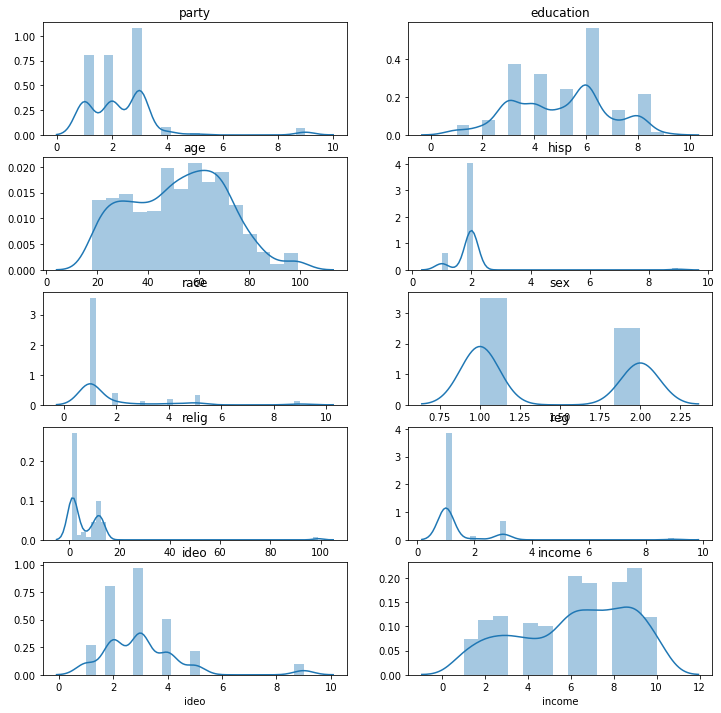

In [185]:
#'educ','sex','age','hisp','racecmb','racethn','relig'
#    ,'attend','reg','partysum','ideo','partyideo','income'

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))

plt.subplot(5,2,1)
sns.distplot(df['party']).set_title('party')
plt.subplot(5,2,2)
sns.distplot(df['educ']).set_title('education')
plt.subplot(5,2,3)
sns.distplot(df['age']).set_title('age')
plt.subplot(5,2,4)
sns.distplot(df['hisp']).set_title('hisp')
plt.subplot(5,2,5)
sns.distplot(df['racecmb']).set_title('race')
plt.subplot(5,2,6)
sns.distplot(df['sex']).set_title('sex')
plt.subplot(5,2,7)
sns.distplot(df['relig']).set_title('relig')
plt.subplot(5,2,8)
sns.distplot(df['reg']).set_title('reg')
plt.subplot(5,2,9)
sns.distplot(df['ideo']).set_title('ideo')
plt.subplot(5,2,10)
sns.distplot(df['income']).set_title('income')


In [158]:
# Proposed Factors

#1 Overall Satisfaction
#df[['q1','q2','q10af1','q10bf1','q14f2','q20']].info() #Q1,Q2,Q20

#2 Perception of Character/Conduct
#df[['q25','q33af1','q33df1','q33ff2','q33hf2','q33if2','q76f1','q77f2','q60','q47','q50e']].info() #Q25 Q47 Q60 Q50E

#3 Perception of Qualification for Position
#df[['q33bf1','q33cf1','q33gf2','q33jf2','q34f1']]

#4 Perception of Equality across the Nation
#df[['q50a','q50d','q61a','q61b','q61c']].info() #q50a q50d q61a/b/c

#5 Foreign Policy
#df[['q50b','q50c','q56f2','q57f2']].info() #Q50B,Q50C


#6 Fiscal Policy(Taxes/Spending)
#df[['q64','q65a','q65b','q65c','q65d','q65e']].info() #all work

#7 Views on religion
#df[['q61ef1','q61ff2','q61gf2','q66','q67','q68a','q68b','q68d','q69']].info()


#df1 = df[['q1','q2','q25','q47','q50a','q50d','q50b','q50c','q64','q65b']] #2 from each
df2 = df[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]


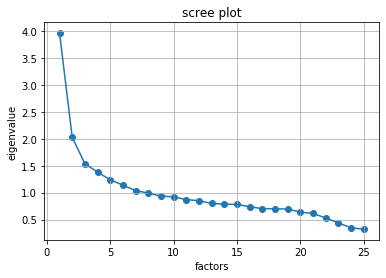

In [159]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 

# Standard Scaling
scaled_data = preprocessing.scale(df2) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T

#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df2.shape[1]+1)


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()


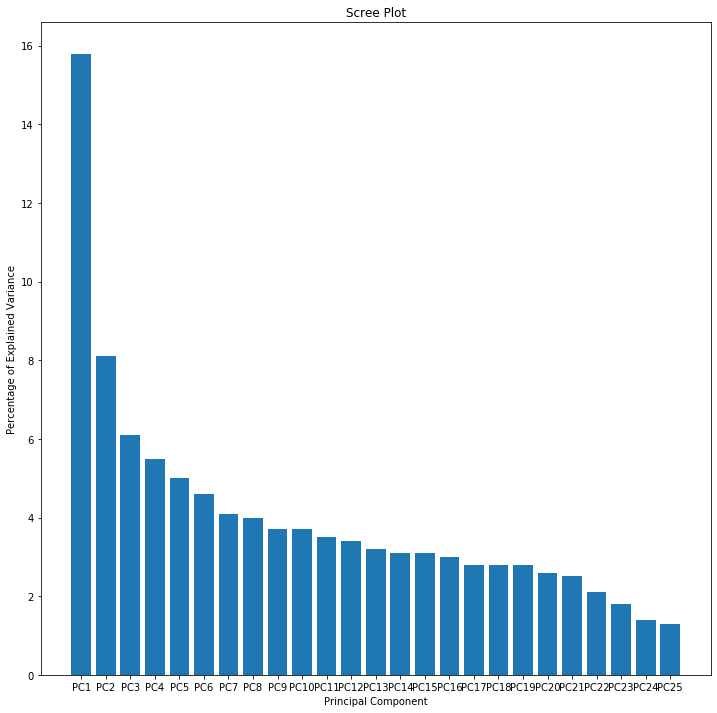

In [160]:

#Principal Component Analysis
pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(12,12)) 
    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


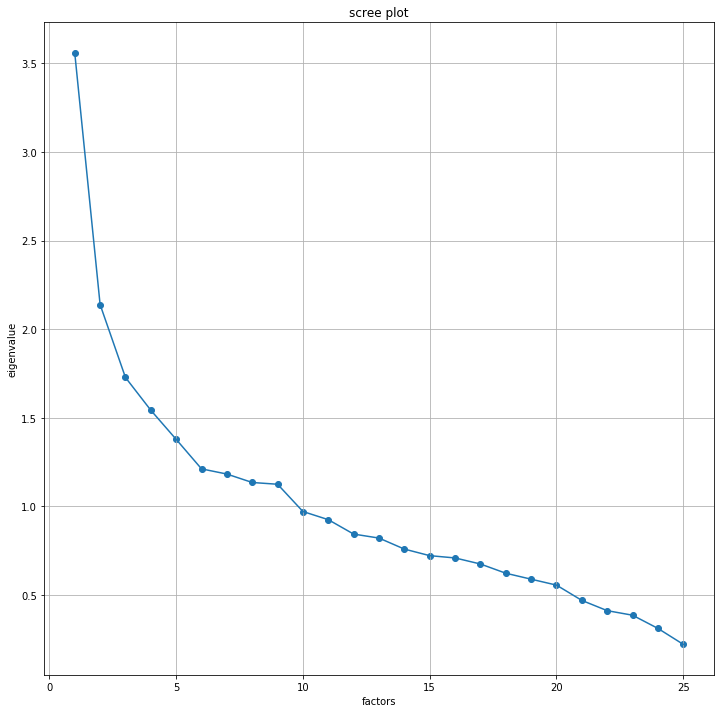

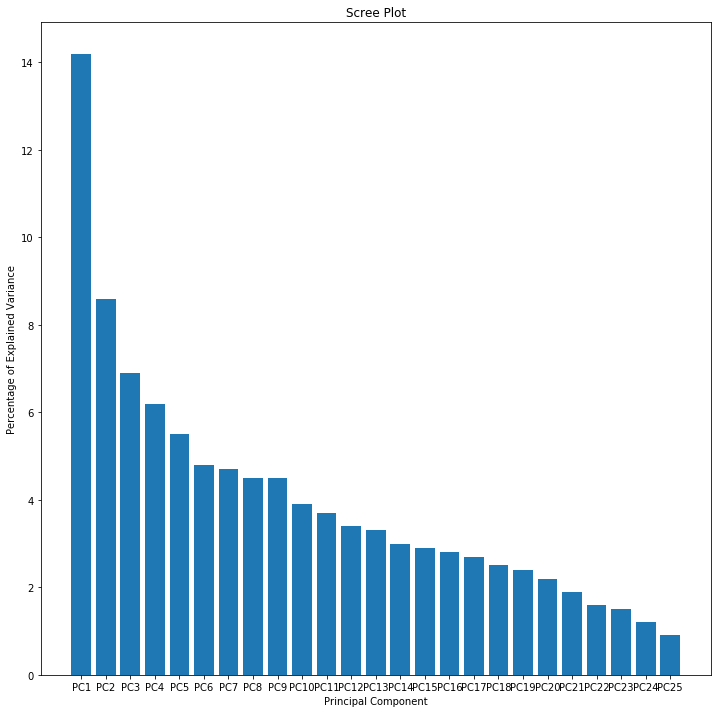

In [167]:
#EFA and PCA for Rich vs Poor

df_rich = df[(df['income'] == 8) | (df['income'] == 9)];

df_rich = df_rich[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]

# Standard Scaling
scaled_data = preprocessing.scale(df_rich) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T


#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_rich.shape[1]+1)

# Principal Component Analysis

pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(12,12))


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

plt.figure(figsize=(12,12))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


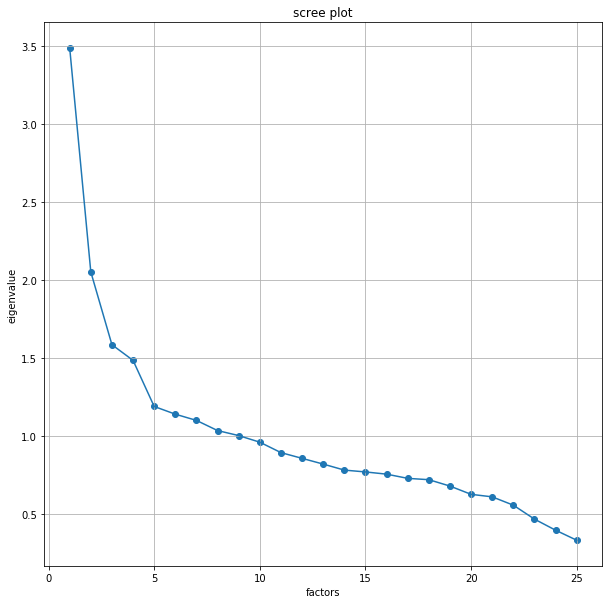

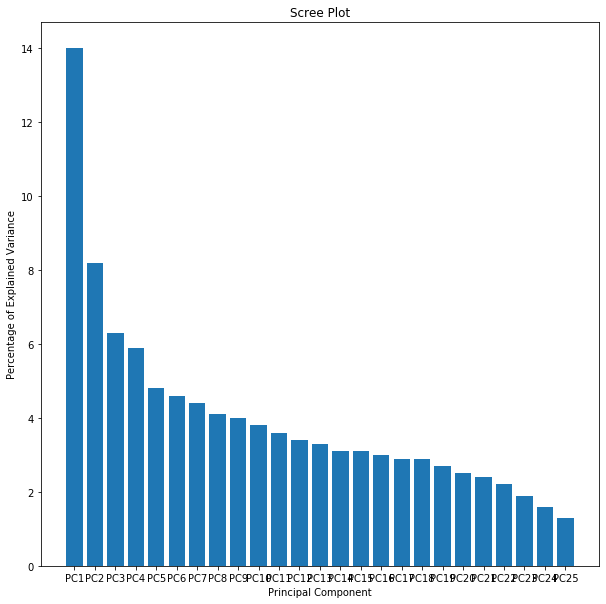

In [173]:
df_poor = df[df['income']<8]

df_poor = df_poor[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]

# Standard Scaling
scaled_data = preprocessing.scale(df_poor) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T


#Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_poor.shape[1]+1)

# Principal Component Analysis

pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,10))


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

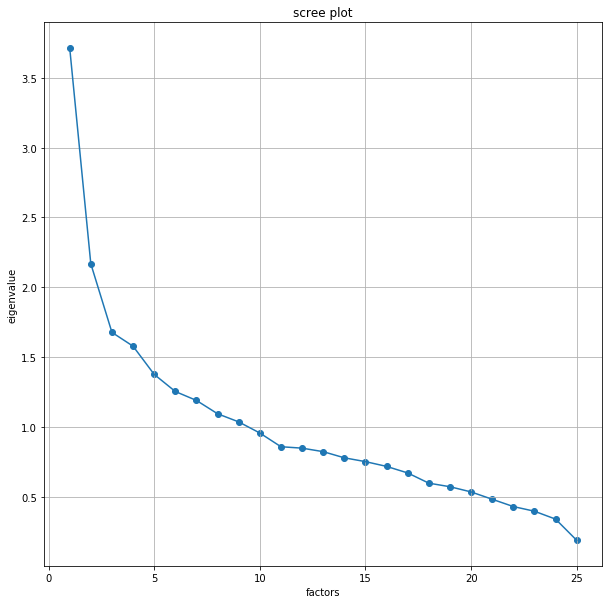

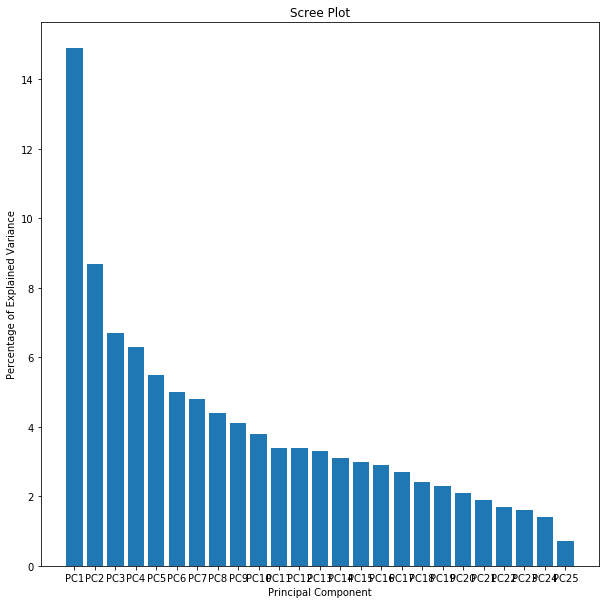

In [174]:
#EFA and PCA for College Educated vs Less Than College

df_coll_ed = df[(df['educ'] > 5) & (df['educ'] < 9)]

df_coll_ed = df_coll_ed[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]

# Standard Scaling
scaled_data = preprocessing.scale(df_coll_ed) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T


#Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_coll_ed.shape[1]+1)

# Principal Component Analysis

pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,10))


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

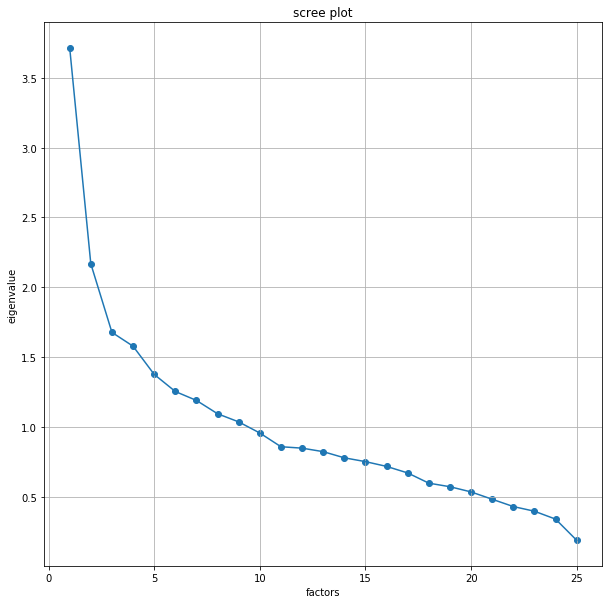

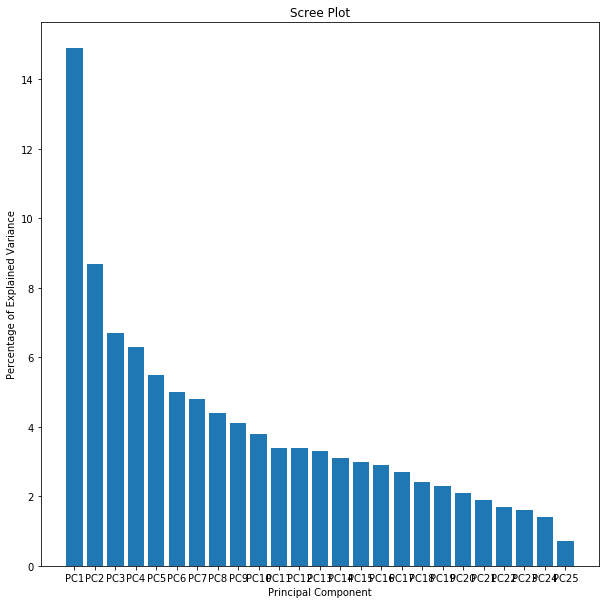

In [175]:
df_no_coll_ed = df[df['educ'] < 6]

df_no_coll_ed = df_no_coll_ed[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]

# Standard Scaling
scaled_data = preprocessing.scale(df_coll_ed) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T


#Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_no_coll_ed.shape[1]+1)

# Principal Component Analysis

pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(10,10))


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


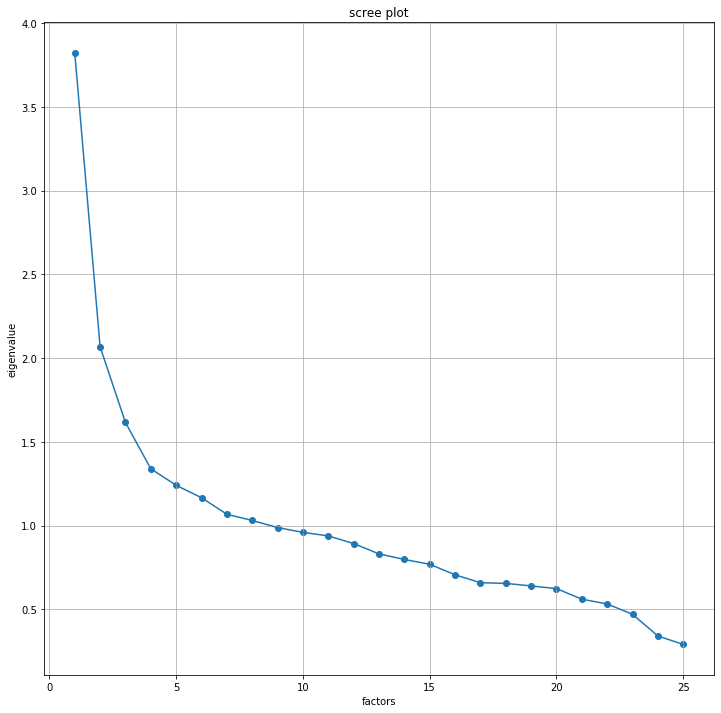

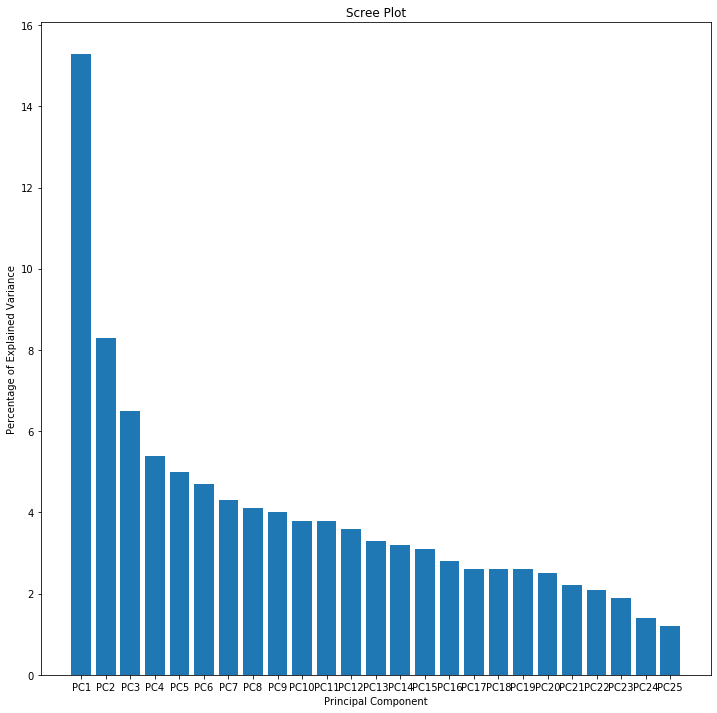

In [184]:
# Politically Elite/Active
df_active = df[(df['q19'] == 1) & (df['reg'] == 1)]

df_active = df_active[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]

# Standard Scaling
scaled_data = preprocessing.scale(df_active) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T


#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_active.shape[1]+1)

# Principal Component Analysis

pca =PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(12,12))


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

plt.figure(figsize=(12,12))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


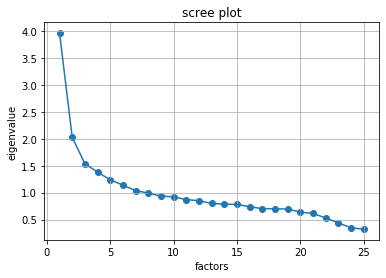

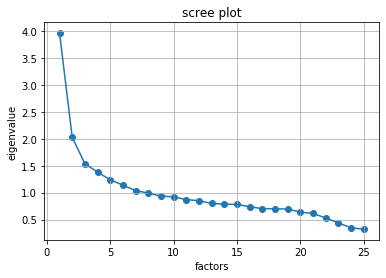

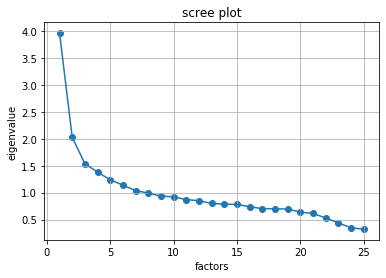

In [180]:
# Checking the order of factors vs results

df_test1 = df[['q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b','q50c',
          'q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69']]

# Standard Scaling
scaled_data = preprocessing.scale(df_test1) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T

#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_test1.shape[1]+1)


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

df_test2 = df[['q50c','q64','q65a','q65b','q65c','q65d','q65e','q66','q68a','q68b','q68d','q69',
              'q1','q2','q20','q25','q47','q60','q50e','q50a','q50d','q61a','q61b','q61c','q50b']]


# Standard Scaling
scaled_data = preprocessing.scale(df_test2) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T

#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_test2.shape[1]+1)


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()

df_test3 = df[['q25','q47','q60','q50e','q50c','q64','q65a','q65b','q65c','q69',
              'q1','q2','q20','q50a','q50d','q61a','q61b','q61c','q50b','q65d','q65e','q66','q68a','q68b','q68d']]


# Standard Scaling
scaled_data = preprocessing.scale(df_test3) #May need to transpose? df.T
#StandardScaler().fit_transform(df) # df.T

#Factor Analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(scaled_data)

loadings = fa.loadings_
ev, v = fa.get_eigenvalues()

# Scree Plot
xvals = range(1,df_test3.shape[1]+1)


plt.scatter(xvals, ev)
plt.plot(xvals,ev)
plt.title("scree plot")
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.grid()
plt.show()